# Design Optimization Homework 2

## Problem 1 solution

Find a stationary point

$$\frac{\partial f}{\partial x_1} = 4x_1-4x_2=0 $$
$$\frac{\partial f}{\partial x_2} = -4x_1+3x_2+1=0 $$

Solve these to get the stationary point $x_* = [1,1]^T$.
\
Calculate the Hessian to get $H=\begin{bmatrix}
4 & -4\\
-4 & 3 
\end{bmatrix}$. 
\
Eigen value of this hessian matrix is given as: $\lambda_{1,2} = \frac{-7 \pm \sqrt65}{2} $.

It is indefinite as one eigenvalue is positive and the other one is negative. 
So, the stationary point is a <u>saddle point</u>. 
        
Now, to find the direction of downslope, denote $\partial \textbf{x}_*=\textbf{x}-\textbf{x}_*$ and $\partial f_* = f(\textbf{x})-f(\textbf{x}_*)$
\
Therefore,

$$
            \begin{aligned}
                \partial f_* & = \nabla f_* \partial \textbf{x}_* + \frac{1}{2} \partial \textbf{x}_*^T \textbf{H} \partial\textbf{x}_* \\
                & = \frac{1}{2}(2\partial x_1 -\partial x_2)(2\partial x_1 -3\partial x_2)
            \end{aligned}
$$

To get the downslope value $\frac{1}{2}(2\partial x_1 -\partial x_2)(2\partial x_1 -3\partial x_2) < 0 $ or $ (2\partial x_1 -\partial x_2)(2\partial x_1 -3\partial x_2) < 0. $

By setting $\partial f_*<0$ to get the downslopes $2\partial x_1 -\partial x_2<0$ and $2\partial x_1 -3\partial x_2>0$ or $2\partial x_1 -\partial x_2>0$ and $2\partial x_1 -3\partial x_2<0$.

Hence, 
The value of a=2, b=1, c=2, d=3. 

## Problem 2 solution
**Part (a)**

Solve the following problem


$$ \min_{x_1,x_2,x_3}  \quad (x_1+1)^2+x_2^2 + (x_3-1)^2 $$                
$$ \text{subject to:} \quad x_1+2x_2+3x_3=1 $$

Substituting $x_1=1-2x_2-3x_3$, the problem reduces to an unconstrained optimization problem. 

$$ minimize: f =\quad (2-2x_2-3x_3)^2 + x_2^2 +(x_3-1)^2 = 5x_2^2- 8x_2+12x_2x_3- 14x_3+10x_3^2 +5 $$

Hence, the gradient is given as:
$G=\begin{bmatrix}
10x_2 +12x_3 -8\\
20x_3+12x_2-14 
\end{bmatrix}$. 

Setting gradient to zero, we find the values of $x_1,x_2,x_3$.

The solution is $x_1=-15/14,x_2=-1/7,x_3=11/14$.

The Hessian matrix is given as:
$H=\begin{bmatrix}
10 & 12\\
12 & 20 
\end{bmatrix}$.

With eigen values, $\lambda_1= 28$ and $\lambda_2=2 $.

The unconstrained problem has positive definite Hessian everywhere. The problem is thus convex. You can also show that the original problem has a convex objective function and a convex feasible solution set.

**Part (b)**

**1. Solving with gradient descent algorithm**

[array([[2],
       [5]]), array([[1.4375  ],
       [4.140625]]), array([[0.99951172],
       [3.46826172]]), array([[0.65877533],
       [2.9420166 ]]), array([[0.39399445],
       [2.52994132]]), array([[0.18853164],
       [2.20707601]]), array([[0.02938923],
       [1.95392054]]), array([[-0.09358686],
       [ 1.75524022]]), array([[-0.18832916],
       [ 1.5991327 ]]), array([[-0.26103463],
       [ 1.47629908]]), array([[-0.31654434],
       [ 1.37947434]]), array([[-0.35864003],
       [ 1.30298251]]), array([[-0.39027589],
       [ 1.24238899]]), array([[-0.41375955],
       [ 1.19422908]]), array([[-0.43089356],
       [ 1.15579574]]), array([[-0.44308586],
       [ 1.12497393]]), array([[-0.45143608],
       [ 1.10011105]]), array([[-0.46217001],
       [ 1.05972061]]), array([[-0.46365356],
       [ 1.0339648 ]]), array([[-0.46007609],
       [ 1.01653584]]), array([[-0.44750326],
       [ 0.99122948]]), array([[-0.3749684 ],
       [ 0.93441067]]), array([[-0.34142115],
 

C:\Users\adity\AppData\Local\Temp\ipykernel_17920\111133271.py:42: RuntimeWarning: divide by zero encountered in log
  f_error_list.append(np.log(abs(obj(soln[i]) - obj(soln[-1]))))


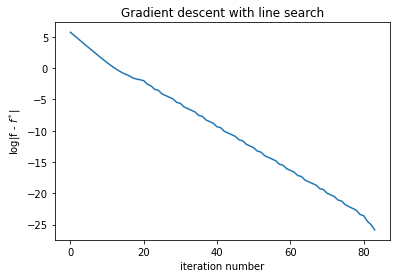

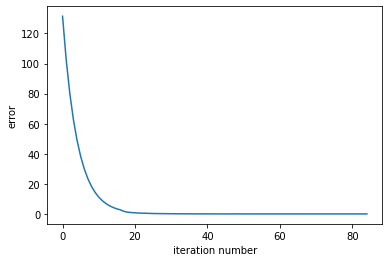

In [9]:
import numpy as np
import matplotlib.pyplot as mplt

def obj(x):
    return 5 * x[0] ** 2 + 10 * x[1] ** 2 + 12 * x[0] * x[1] - 8 * x[0] - 14 * x[1] + 5

def grad(x):
    return np.array([10 * x[0] + 12 * x[1] - 8, 20 * x[1] + 12 * x[0] - 14])

eps = 1e-5  # using epsilon as termination criteria
x_0 = np.array([[2], [5]]) # where x_0 is the initial guess
iter = 0  # counter
soln = [x_0]
x = soln[iter]  # starting with the initial guess of 2,5
error = np.linalg.norm(grad(x), ord=2)

error_list = list()
iter_list = list()
error_list.append(error)
iter_list.append(iter)

def line_search(x):
    dx = 1.  # step size
    phi = lambda dx, x: obj(x) - dx * 0.8 * np.matmul(grad(x).T, grad(x))  # define phi as a search criterion
    while phi(dx, x) < obj(x - dx * grad(x)):  # if f(x+dx*d)>phi(dx) then backtrack. d is the search direction
        dx = 0.5 * dx
    return dx

while error >= eps:  # keep searching while gradient norm is larger than eps
    x_star = line_search(x)
    x = x - x_star * grad(x)
    soln.append(x)
    error = np.linalg.norm(grad(x), ord=2)
    iter += 1
    error_list.append(error)
    iter_list.append(iter)

print(soln)  # print the search trajectory
print('The point in the plane is', 'x1 =', 1-2*soln[-1][0]-3*soln[-1][1], 'x2 =', soln[-1][0], 'x3 =', soln[-1][1])
f_error_list = list()
for i in range(len(iter_list)):
    f_error_list.append(np.log(abs(obj(soln[i]) - obj(soln[-1]))))
    
mplt.figure(1)
mplt.plot(iter_list, f_error_list)
mplt.xlabel('iteration number')
mplt.ylabel('log|f - $f^*$|')
mplt.title('Gradient descent with line search')
mplt.show()

mplt.figure(2)
mplt.plot(iter_list, error_list)
mplt.xlabel('iteration number')
mplt.ylabel('error')
mplt.show()

**2. Solving with newtons algorithm**

[array([[2],
       [5]]), array([[0.92857143],
       [2.89285714]]), array([[0.39285714],
       [1.83928571]]), array([[0.125 ],
       [1.3125]]), array([[-0.00892857],
       [ 1.04910714]]), array([[-0.07589286],
       [ 0.91741071]]), array([[-0.109375 ],
       [ 0.8515625]]), array([[-0.12611607],
       [ 0.81863839]]), array([[-0.13448661],
       [ 0.80217634]]), array([[-0.13867187],
       [ 0.79394531]]), array([[-0.14076451],
       [ 0.7898298 ]]), array([[-0.14181083],
       [ 0.78777204]]), array([[-0.14233398],
       [ 0.78674316]]), array([[-0.14259556],
       [ 0.78622872]]), array([[-0.14272635],
       [ 0.78597151]]), array([[-0.14279175],
       [ 0.7858429 ]]), array([[-0.14282445],
       [ 0.78577859]]), array([[-0.14284079],
       [ 0.78574644]]), array([[-0.14284897],
       [ 0.78573036]]), array([[-0.14285306],
       [ 0.78572232]]), array([[-0.1428551],
       [ 0.7857183]]), array([[-0.14285612],
       [ 0.7857163 ]]), array([[-0.14285663],
   

C:\Users\adity\AppData\Local\Temp\ipykernel_17920\979631453.py:37: RuntimeWarning: divide by zero encountered in log
  f_error_list.append(np.log(abs(obj(soln[i]) - obj(soln[-1]))))


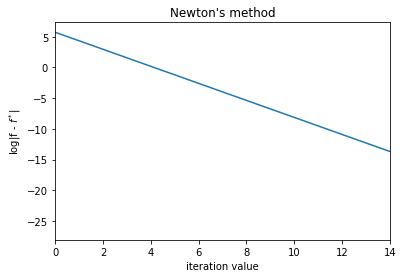

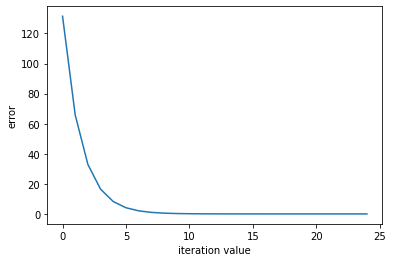

In [11]:
import numpy as np
import matplotlib.pyplot as mplt

def obj(x):
    return 5 * x[0] ** 2 + 10 * x[1] ** 2 + 12 * x[0] * x[1] - 8 * x[0] - 14 * x[1] + 5

def grad(x):
    return np.array([10 * x[0] + 12 * x[1] - 8, 20 * x[1] + 12 * x[0] - 14])

eps = 1e-5  # using epsilon as termination criteria
x_0 = np.array([[2], [5]])  # where x_0 is the initial guess
iter = 0 
soln = [x_0]  
x = soln[iter]  # starting with the initial guess of 2,5
error = np.linalg.norm(grad(x), ord=2)

H = np.array([[10, 12], [12, 20]])  #Hessian matrix
dx = 0.5 #Step value

error_list = list()
iter_list = list()
error_list.append(error)
iter_list.append(iter)

while error >= eps:  # searching while gradient norm is larger than epsilon
    x = x - dx * np.matmul(np.linalg.inv(H), grad(x))
    soln.append(x)
    error = np.linalg.norm(grad(x), ord=2)
    iter += 1
    error_list.append(error)
    iter_list.append(iter)

print(soln)  # print the search trajectory
print('The point in the plane is', 'x1 =', 1-2*soln[-1][0]-3*soln[-1][1], 'x2 =', soln[-1][0], 'x3 =', soln[-1][1])
f_error_list = list()
for i in range(len(iter_list)):
    f_error_list.append(np.log(abs(obj(soln[i]) - obj(soln[-1]))))
    
mplt.figure(1)
mplt.plot(iter_list, f_error_list)
mplt.xlabel('iteration value')
mplt.xlim(0, 14)
mplt.ylabel('log|f - $f^*$|')
mplt.title('''Newton's method''')
mplt.show()

mplt.figure(2)
mplt.plot(iter_list, error_list)
mplt.xlabel('iteration value')
mplt.ylabel('error')
mplt.show()